# 导入自带数据集

In [41]:
# 导入工具库
from sklearn.datasets import load_iris
iris = load_iris()
#数据是以「字典」格式存储的，看看 iris 的键有哪些。
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

# 读取数据集的信息

In [42]:
#输出iris 数据中特征的大小、名称等信息和前五个样本。
n_samples, n_features = iris.data.shape
print((n_samples, n_features))
print(iris.feature_names)
print(iris.target.shape)
print(iris.target_names)
iris.data[0:5]

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
(150,)
['setosa' 'versicolor' 'virginica']


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

# DataFrame格式数据集


In [43]:
# 将X和y合并为Dataframe格式数据
import pandas as pd
import seaborn as sns
iris_data = pd.DataFrame( iris.data,
                          columns=iris.feature_names )
iris_data['species'] = iris.target_names[iris.target]
iris_data.head(3).append(iris_data.tail(3))

<ipython-input-43-9bfa7b32f3a9>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  iris_data.head(3).append(iris_data.tail(3))


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


# 查看数据的分布特性

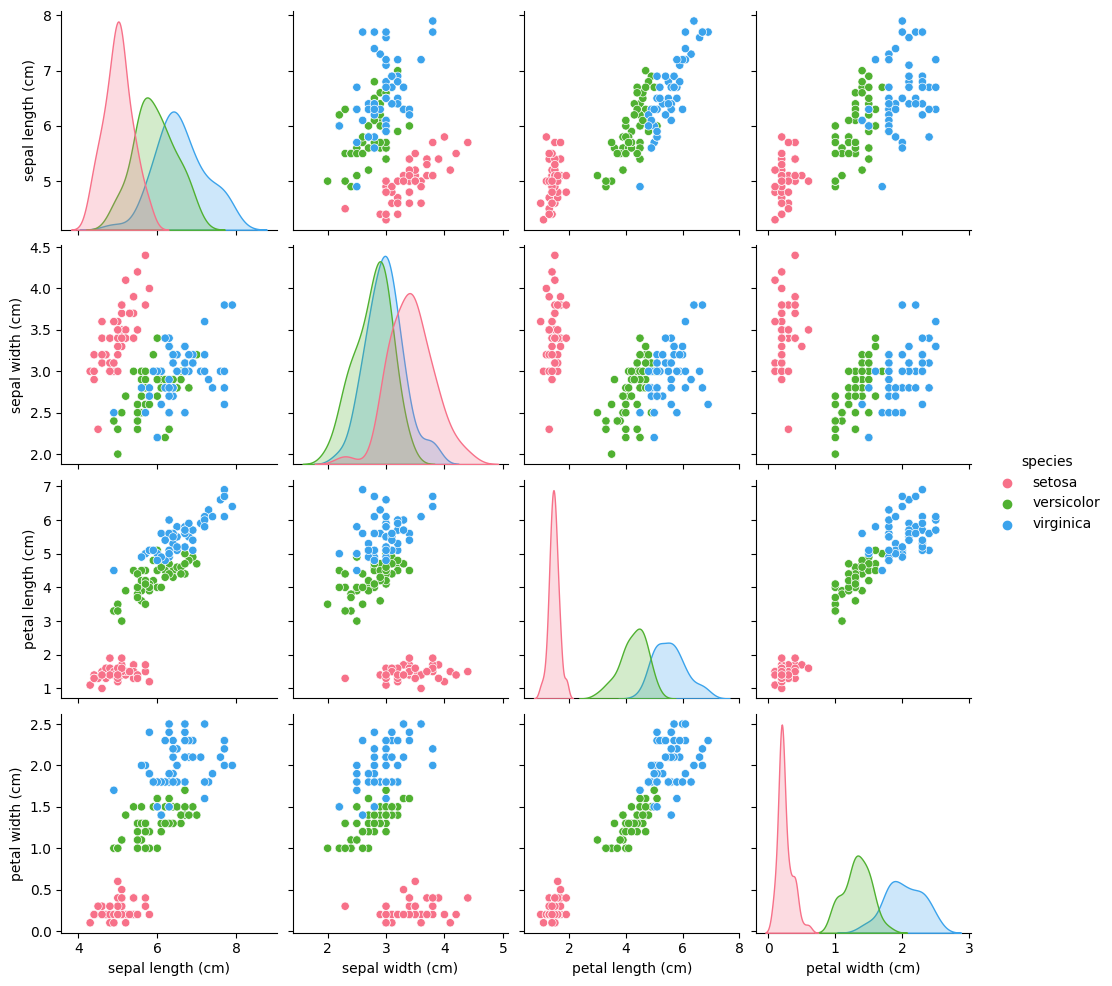

In [44]:
# 使用Seaborn的pairplot查看两两特征之间的关系
sns.pairplot( iris_data, hue='species', palette='husl' )

# 高级API

## Ensemble 估计器

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)

### RandomForestClassifier

随机森林RandomForestClassifier通过控制n_estimators超参数来决定基估计器的个数，在这里是4棵决策树(森林由树组成)；此外每棵树的最大树深为5(max_depth=5)。

In [46]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier( n_estimators=4, max_depth=5 )
RF.fit( X_train, y_train )
print( RF.n_estimators )
RF.estimators_

print ( "RF - Accuracy (Train):  %.4g" %
        metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "RF - Accuracy (Test):  %.4g" %
        metrics.accuracy_score(y_test, RF.predict(X_test)) )

4
RF - Accuracy (Train):  0.9917
RF - Accuracy (Test):  0.9333


### VotingClassifier

和随机森林由同质分类器「决策树」不同，投票分类器由若干个异质分类器组成。下面我们用VotingClassifier建立个含有逻辑回归(Logistic regression)、随机森林(RandomForest)和高斯朴素贝叶斯(GNB)三个分类器的集成模型。

RandomForestClassifier的基分类器只能是决策树，因此只用通过控制n_estimators超参数来决定树的个数，而VotingClassifier的基分类器要输入每个异质分类器。

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
LR = LogisticRegression( solver='lbfgs', multi_class='multinomial' )
RF = RandomForestClassifier( n_estimators=5 )
GNB = GaussianNB()
Ensemble = VotingClassifier( estimators=[('lr', LR), ('rf', RF), ('gnb', GNB)], voting='hard' )
Ensemble. fit( X_train, y_train )

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial')),
                             ('rf', RandomForestClassifier(n_estimators=5)),
                             ('gnb', GaussianNB())])

In [48]:
print( len(Ensemble.estimators_) )
Ensemble.estimators_

3


[LogisticRegression(multi_class='multinomial'),
 RandomForestClassifier(n_estimators=5),
 GaussianNB()]

对比使用一个和使用多个

In [49]:
# 单个拟合
LR.fit( X_train, y_train )
RF.fit( X_train, y_train )
GNB.fit( X_train, y_train )

GaussianNB()

评估

In [50]:
# 评估效果
print ( "LR - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, LR.predict(X_train)) )
print ( "RF - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, RF.predict(X_train)) )
print ( "GNB - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, GNB.predict(X_train)) )
print ( "Ensemble - Accuracy (Train): %.4g" % metrics.accuracy_score(y_train, Ensemble.predict(X_train)) )
print ( "LR - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, LR.predict(X_test)) )
print ( "RF - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, RF.predict(X_test)) )
print ( "GNB - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, RF.predict(X_test)) )
print ( "Ensemble - Accuracy (Test): %.4g" % metrics.accuracy_score(y_test, Ensemble.predict(X_test)) )

LR - Accuracy (Train): 0.975
RF - Accuracy (Train): 0.9833
GNB - Accuracy (Train): 0.9667
Ensemble - Accuracy (Train): 0.975
LR - Accuracy (Test): 0.9
RF - Accuracy (Test): 0.9333
GNB - Accuracy (Test): 0.9333
Ensemble - Accuracy (Test): 0.9333


## Multiclass 估计器

sklearn.multiclass可以处理多类别(multi-class) 的多标签(multi-label) 的分类问题。下面我们会使用数字数据集digits作为示例数据来讲解。我们先将数据分成 80:20 的训练集和测试集。

In [51]:
# 导入数据
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [52]:
# 数据集切分
X_train, X_test, y_train, y_test = train_test_split( digits['data'], digits['target'], test_size=0.2 )
print( 'The size of X_train is ', X_train.shape )
print( 'The size of y_train is ', y_train.shape )
print( 'The size of X_test is ', X_test.shape )
print( 'The size of y_test is ', y_test.shape )

The size of X_train is  (1437, 64)
The size of y_train is  (1437,)
The size of X_test is  (360, 64)
The size of y_test is  (360,)


训练集和测试集分别有1437和360张图像。每张照片是包含8×8的像素，我们用flatten操作把2维的8×8展平为1维的64。

看看训练集中前100张图片和对应的标签（如下图）。像素很低，但基本上还是能看清。

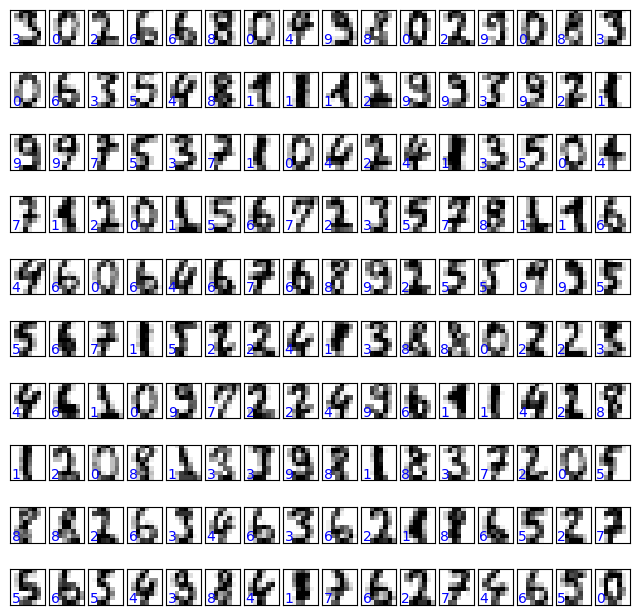

In [53]:
import matplotlib.pyplot as plt
# 创建一个包含10行16列的图形，设置图形大小为8x8英寸
fig, axes = plt.subplots(10, 16, figsize=(8, 8))
# 调整子图之间的水平和垂直间距
fig.subplots_adjust(hspace=0.1, wspace=0.1)
# 遍历所有子图
for i, ax in enumerate(axes.flat):
    # 在当前子图上显示第i个训练样本的图像，reshape将图像数据从一维转换为二维
    ax.imshow(X_train[i, :].reshape(8, 8), cmap='binary', interpolation='nearest')
    # 在子图上添加文本，显示第i个训练样本的标签（y_train[i]）
    ax.text(0.05, 0.05, str(y_train[i]),
            transform=ax.transAxes, color='blue')  # 文本位置在子图左下角，transform=ax.transAxes表示使用轴坐标系
    # 隐藏子图的x轴和y轴刻度
    ax.set_xticks([])
    ax.set_yticks([])
# 显示图形
plt.show()

### 多类别分类

手写数字有0-9十类，但手头上只有二分类估计器（比如像支撑向量机）怎么用呢？我们可以采取以下策略处理：


*   一对一(One vs One，OvO)：一个分类器用来处理数字0和数字1，一个用来处理数字0和数字2，一个用来处理数字1和2，以此类推。N个类需要N(N-1)/2个分类器。
*   一对其他(One vs All，OvA)：训练10个二分类器，每一个对应一个数字，第一个分类「1」和「非1」，第二个分类「2」和「非2」，以此类推。N个类需要N个分类器。

OneVsOneClassifier




In [54]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
ovo_lr = OneVsOneClassifier( LogisticRegression(solver='lbfgs', max_iter=200) )
ovo_lr.fit( X_train, y_train )
# 使用LogisticRegression作为基础分类器。参数solver='lbfgs'表示使用LBFGS优化算法，max_iter=200表示最大迭代次数为200。

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


OneVsOneClassifier(estimator=LogisticRegression(max_iter=200))

10*9/2=45，10类总共45个OvO分类器。

In [ ]:
print( len(ovo_lr.estimators_) )
ovo_lr.estimators_

In [56]:
from sklearn import metrics

# 计算训练集的准确度
train_accuracy_ovo_lr = metrics.accuracy_score(y_train, ovo_lr.predict(X_train))
print("OvO LR - Accuracy (Train): %.4g" % train_accuracy_ovo_lr)

# 计算测试集的准确度
test_accuracy_ovo_lr = metrics.accuracy_score(y_test, ovo_lr.predict(X_test))
print("OvO LR - Accuracy (Test): %.4g" % test_accuracy_ovo_lr)


OvO LR - Accuracy (Train): 1
OvO LR - Accuracy (Test): 0.9889


OneVsRestClassifier

In [57]:
from sklearn.multiclass import OneVsRestClassifier
ova_lr = OneVsRestClassifier( LogisticRegression(solver='lbfgs', max_iter=800) )
ova_lr.fit( X_train, y_train )

OneVsRestClassifier(estimator=LogisticRegression(max_iter=800))

In [58]:
print( len(ova_lr.estimators_) )
ova_lr.estimators_

10


[LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800),
 LogisticRegression(max_iter=800)]

10类总共10个OvA分类器。

In [59]:
from sklearn import metrics

# 计算训练集的准确度
train_accuracy_ova_lr = metrics.accuracy_score(y_train, ova_lr.predict(X_train))
print("OvA LR - Accuracy (Train): %.4g" % train_accuracy_ova_lr)

# 计算测试集的准确度
test_accuracy_ova_lr = metrics.accuracy_score(y_test, ova_lr.predict(X_test))
print("OvA LR - Accuracy (Test): %.4g" % test_accuracy_ova_lr)


OvA LR - Accuracy (Train): 0.9993
OvA LR - Accuracy (Test): 0.9528


### 多标签分类

在手写数字的例子上，我们特意为每个数字设计了两个标签：

*   标签1：奇数、偶数
*   标签2：小于等于4，大于4




我们构建多标签y_train_multilabel，代码如下（OneVsRestClassifier也可以用来做多标签分类）：

In [60]:
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
y_train_multilabel = np.c_[y_train%2==0, y_train<=4 ]
print(y_train_multilabel)

[[False  True]
 [ True  True]
 [ True  True]
 ...
 [ True False]
 [ True  True]
 [ True  True]]


我们这次用y_train_multilabel来训练模型。代码如下

In [61]:
ova_ml = OneVsRestClassifier( LogisticRegression(solver='lbfgs', max_iter=800) )
ova_ml.fit( X_train, y_train_multilabel )

OneVsRestClassifier(estimator=LogisticRegression(max_iter=800))

有两个估计器，每个对应一个标签。

In [62]:
print( len(ova_ml.estimators_) )
ova_ml.estimators_

2


[LogisticRegression(max_iter=800), LogisticRegression(max_iter=800)]

展示一下测试集上100张图片。

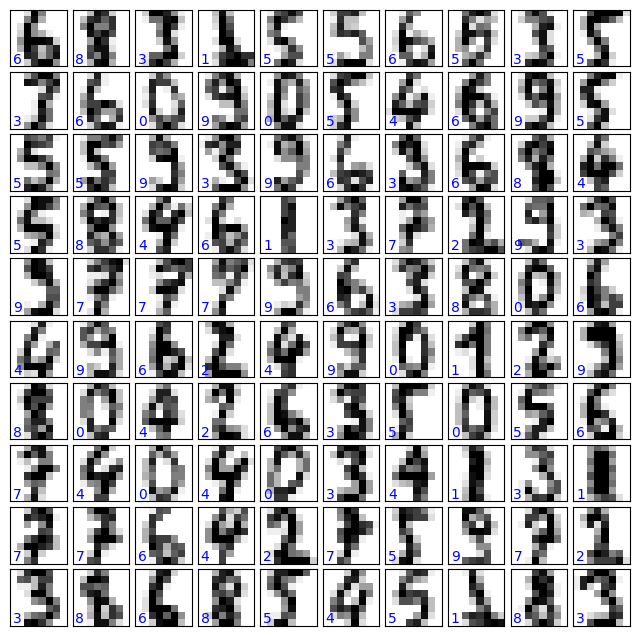

In [63]:
fig, axes = plt.subplots( 10, 10, figsize=(8, 8) )
fig.subplots_adjust( hspace=0.1, wspace=0.1 )
for i, ax in enumerate( axes.flat ):
    ax.imshow( X_test[i,:].reshape(8,8), cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_test[i]), transform=ax.transAxes, color='blue')
    ax.set_xticks([])
    ax.set_yticks([])
# 显示图形
plt.show()

第一个数字是7，验证一下他的两个标签对不对

In [64]:
print( y_test[:1] )
print( ova_ml.predict(X_test[:1,:]) )

[6]
[[1 0]]


## Multioutput 估计器

sklearn.multioutput可以处理多输出(multi-output)的分类问题。

多输出分类是多标签分类的泛化，在这里每一个标签可以是多类别(大于两个类别)的。一个例子就是预测图片每一个像素(标签)的像素值是多少(从0到255的256个类别)。

Multioutput估计器有两个：


*   MultiOutputRegressor：多输出回归
*   MultiOutputClassifier：多输出分类


这里我们只关注多输出分类。

### MultiOutputClassifier

In [65]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

在手写数字的例子上，我们也为特意每个数字设计了多标签而且每个标签的类别都大于二。
*   标签1：小于等于4，4和7之间，大于等于7(三类)
*   标签2：数字本身(十类)

In [66]:
y_train_1st = y_train.copy()
y_train_1st[ y_train<=4 ] = 0
y_train_1st[ np.logical_and(y_train>4, y_train<7) ] = 1
y_train_1st[ y_train>=7 ] = 2
y_train_multioutput = np.c_[y_train_1st, y_train]
y_train_multioutput

array([[0, 3],
       [0, 0],
       [0, 2],
       ...,
       [1, 6],
       [0, 2],
       [0, 2]])

用含有100棵决策树的随机森林来解决这个多输入分类问题。

In [67]:
MO = MultiOutputClassifier( RandomForestClassifier(n_estimators=100) )
MO.fit( X_train, y_train_multioutput )

MultiOutputClassifier(estimator=RandomForestClassifier())

In [68]:
# 测试
MO.predict( X_test[:5,:] )

array([[1, 6],
       [2, 8],
       [0, 3],
       [0, 1],
       [1, 5]])

In [69]:
# 真实答案
y_test_1st = y_test.copy()
y_test_1st[ y_test<=4 ] = 0
y_test_1st[ np.logical_and(y_test>4, y_test<7) ] = 1
y_test_1st[ y_test>=7 ] = 2
y_test_multioutput = np.c_[ y_test_1st, y_test ]
y_test_multioutput[:5]

array([[1, 6],
       [2, 8],
       [0, 3],
       [0, 1],
       [1, 5]])

## Model Selection 估计器

模型选择(Model Selction)在机器学习非常重要，它主要用于评估模型表现，常见的Model Selection估计器有以下几个：

*   cross_validate：评估交叉验证的结果。
*   learning_curve：构建与绘制学习曲线。
*   GridSearchCV：用交叉验证从超参数候选网格中搜索出最佳超参数。
*   RandomizedSearchCV：用交叉验证从一组随机超参数搜索出最佳超参数。

这里我们只关注调节超参数的两个估计器，即GridSearchCV和RandomizedSearchCV。

## 交叉验证

K-折交叉验证(K-fold cross validation set)，指的是把整个数据集平均但随机分成K份，每份大概包含m/K个数据(m 是总数据数)。

在这K份，每次选K-1份作为训练集拟合参数，在剩下1份验证集上进行评估计算。由于遍历了这K份数据，因此该操作称为交叉验证。

In [70]:
from time import time
from scipy.stats import randint
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets


X, y = digits.data, digits.target
RFC = RandomForestClassifier(n_estimators=20)

# 随机搜索/Randomized Search
# 最大树深、最多特征数、最小可分裂样本数、分裂标准
param_dist = {
    "max_depth": [3, 5],
    "max_features": randint(1, 11),
    "min_samples_split": randint(2, 11),
    "criterion": ["gini", "entropy"]
}
n_iter_search = 20
random_search = RandomizedSearchCV(RFC, param_distributions=param_dist, n_iter=n_iter_search, cv=5)
start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates, parameter settings." % ((time() - start), n_iter_search))
print(random_search.best_params_)
print(random_search.best_score_)

# 网格搜索/Grid Search
# 最大树深、最多特征数、最小可分裂样本数、分裂标准
param_grid = {
    "max_depth": [3, 5],
    "max_features": [1, 3, 10],
    "min_samples_split": [2, 3, 10],
    "criterion": ["gini", "entropy"]
}
grid_search = GridSearchCV(RFC, param_grid=param_grid, cv=5)
start = time()
grid_search.fit(X, y)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings." % (time() - start, len(grid_search.cv_results_['params'])))
print(grid_search.best_params_)
print(grid_search.best_score_)


RandomizedSearchCV took 5.83 seconds for 20 candidates, parameter settings.
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 5, 'min_samples_split': 10}
0.8870427112349117
GridSearchCV took 10.62 seconds for 36 candidate parameter settings.
{'criterion': 'entropy', 'max_depth': 5, 'max_features': 10, 'min_samples_split': 2}
0.8809223150727329


第一行输出每种追踪法运行的多少次和花的时间。
第二行输出最佳超参数的组合。
第三行输出最高得分。

In [71]:
# 获取最佳模型
best_model = grid_search.best_estimator_

# 使用最佳模型进行预测
predictions = best_model.predict(X_test)
predictions

array([6, 8, 3, 1, 5, 5, 6, 5, 3, 5, 3, 6, 0, 9, 0, 5, 4, 6, 9, 5, 5, 5,
       9, 3, 9, 6, 3, 6, 8, 4, 5, 8, 4, 6, 1, 3, 7, 2, 9, 3, 9, 7, 7, 7,
       9, 6, 3, 8, 0, 6, 4, 9, 6, 2, 4, 9, 0, 1, 2, 9, 8, 0, 4, 2, 6, 3,
       5, 0, 5, 6, 7, 4, 0, 4, 0, 3, 4, 1, 3, 1, 7, 7, 6, 4, 2, 7, 5, 9,
       7, 2, 3, 6, 6, 8, 5, 4, 5, 1, 8, 3, 0, 1, 5, 4, 9, 0, 1, 0, 8, 8,
       9, 7, 6, 6, 0, 0, 0, 8, 8, 7, 0, 3, 8, 5, 3, 3, 9, 1, 5, 5, 2, 1,
       6, 9, 8, 3, 2, 8, 1, 9, 6, 0, 6, 1, 6, 2, 9, 5, 2, 5, 5, 6, 0, 6,
       7, 5, 4, 2, 9, 4, 2, 6, 5, 9, 3, 4, 4, 2, 7, 9, 6, 5, 7, 9, 4, 3,
       8, 4, 7, 0, 5, 4, 3, 4, 3, 3, 1, 5, 5, 2, 8, 2, 0, 7, 3, 5, 0, 0,
       3, 4, 9, 7, 8, 8, 1, 3, 9, 6, 4, 2, 6, 7, 2, 6, 3, 7, 9, 6, 1, 7,
       7, 5, 2, 8, 1, 8, 6, 4, 0, 7, 6, 4, 4, 9, 1, 4, 4, 3, 0, 7, 3, 0,
       6, 3, 7, 5, 6, 6, 5, 7, 2, 8, 5, 3, 6, 6, 9, 0, 7, 2, 0, 1, 9, 1,
       0, 9, 3, 7, 3, 1, 6, 4, 1, 9, 5, 6, 2, 0, 9, 2, 6, 4, 9, 1, 7, 0,
       3, 7, 7, 9, 9, 3, 5, 2, 8, 6, 5, 1, 4, 1, 1,

## Pipeline 估计器

Pipeline估计器又叫流水线，把各种估计器串联(Pipeline)或并联(FeatureUnion)的方式组成一条龙服务。用好了它真的能大大提高效率。

### Pipeline

下面是一个简单示例，使用Pipeline来完成「填补缺失值-标准化」这两步的。我们先构建含缺失值NaN的数据X。

In [72]:
X = np.array([[56,40,30,5,7,10,9,np.NaN,12],
              [1.68,1.83,1.77,np.NaN,1.9,1.65,1.88,np.NaN,1.75]])
X = np.transpose(X) # np.transpose(X)将输入矩阵 X 进行转置操作。

我们用以下流程组件构建Pipeline：
*   处理缺失值的转换器SimpleImputer。
*   做规划化的转换器MinMaxScaler。

In [73]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

# 创建一个 Pipeline 对象，它将按顺序执行以下两个步骤：
# 1. 'impute': 使用均值填充缺失值
# 2. 'normalize': 使用MinMaxScaler进行归一化

pipe = Pipeline([
    # 第一个步骤 'impute': 使用 SimpleImputer 进行缺失值填充
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),

    # 第二个步骤 'normalize': 使用 MinMaxScaler 进行特征归一化
    ('normalize', MinMaxScaler())
])


使用方式非常简单，在Pipeline()里输入(名称,估计器)这个元组构建的流水线列表。在本例中SimpleImputer起名叫impute，MinMaxScaler起名叫normalize。

In [74]:
X_proc = pipe.fit_transform( X )
X_proc

array([[1.        , 0.12      ],
       [0.68627451, 0.72      ],
       [0.49019608, 0.48      ],
       [0.        , 0.52      ],
       [0.03921569, 1.        ],
       [0.09803922, 0.        ],
       [0.07843137, 0.92      ],
       [0.31617647, 0.52      ],
       [0.1372549 , 0.4       ]])

### FeatureUnion

如果我们想在一个节点同时运行几个估计器，我们可用FeatureUnion。在下面的例子中，我们首先建立一个DataFrame数据，它有如下特点：
*   前两列字段「智力IQ」和「脾气temper」都是类别型变量。
*   后两列字段「收入income」和「身高height」都是数值型变量。
*   每列中都有缺失值。






In [75]:
import pandas as pd
d = {'IQ': ['high', 'avg', 'avg', 'low', 'high', 'avg', 'high', 'high', None],
     'temper': ['good', None, 'good', 'bad', 'bad', 'bad', 'bad', None, 'bad'],
     'income': [50, 40, 30, 5, 7, 10, 9, np.NaN, 12],
     'height': [1.68, 1.83, 1.77, np.NaN, 1.9, 1.65, 1.88, np.NaN, 1.75]}
X = pd.DataFrame(d)
X


,IQ,temper,income,height
0,high,good,50.0,1.68
1,avg,None,40.0,1.83
2,avg,good,30.0,1.77
3,low,bad,5.0,NaN
4,high,bad,7.0,1.90
5,avg,bad,10.0,1.65
6,high,bad,9.0,1.88
7,high,None,NaN,NaN
8,None,bad,12.0,1.75


我们现在按下列步骤来清洗数据。
*   对类别型变量：获取数据 → 中位数填充 → 独热编码
*   对数值型变量：获取数据 → 均值填充 → 标准化



In [82]:
from sklearn.base import BaseEstimator, TransformerMixin
# 定义 DataFrameSelector 类，该类用于选择数据框中的特定列
class DataFrameSelector(BaseEstimator, TransformerMixin):
    # 构造函数，接受一个参数 attribute_names，即要选择的列名
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    # fit 方法，由于不需要额外的拟合逻辑，直接返回 self
    def fit(self, X, y=None):
        return self

    # transform 方法，将数据框中指定的列转换为 NumPy 数组并返回
    def transform(self, X):
        return X[self.attribute_names].values

接下来建立流水线full_pipe，它并联着两个流水线
1.  List itemcategorical_pipe处理分类型变量
*   DataFrameSelector用来获取
*   SimpleImputer用出现最多的值来填充None
*   OneHotEncoder来编码返回非稀疏矩阵
2.  numeric_pipe处理数值型变量
*   DataFrameSelector用来获取
*   SimpleImputer用均值来填充NaN
*   normalize来规范化数值













In [81]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
# 定义分类特征和数值特征的列名
categorical_features = ['IQ', 'temper']
numeric_features = ['income', 'height']

# 创建处理分类特征的管道
categorical_pipe = Pipeline([
    # 选择分类特征的列
    ('select', DataFrameSelector(categorical_features)),

    # 使用最频繁值填充缺失值
    ('impute', SimpleImputer(missing_values=None, strategy='most_frequent')),

    # 对分类特征进行独热编码
    ('one_hot_encode', OneHotEncoder(sparse=False))
])

# 创建处理数值特征的管道
numeric_pipe = Pipeline([
    # 选择数值特征的列
    ('select', DataFrameSelector(numeric_features)),

    # 使用平均值填充缺失值
    ('impute', SimpleImputer(missing_values=np.nan, strategy='mean')),

    # 对数值特征进行归一化
    ('normalize', MinMaxScaler())
])

# 使用 FeatureUnion 合并两个管道，以并行处理分类和数值特征
full_pipe = FeatureUnion(transformer_list=[
    ('numeric_pipe', numeric_pipe),
    ('categorical_pipe', categorical_pipe)
])

打印结果

In [84]:
X_proc = full_pipe.fit_transform( X )
X_proc

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[1.        , 0.12      , 0.        , 1.        , 0.        ,
        0.        , 1.        ],
       [0.77777778, 0.72      , 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.55555556, 0.48      , 1.        , 0.        , 0.        ,
        0.        , 1.        ],
       [0.        , 0.52      , 0.        , 0.        , 1.        ,
        1.        , 0.        ],
       [0.04444444, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        ],
       [0.11111111, 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.        ],
       [0.08888889, 0.92      , 0.        , 1.        , 0.        ,
        1.        , 0.        ],
       [0.34166667, 0.52      , 0.        , 1.        , 0.        ,
        1.        , 0.        ],
       [0.15555556, 0.4       , 0.        , 1.        , 0.        ,
        1.        , 0.        ]])